In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

ads_stream = pd.read_csv('ads_stream.csv')
store_stream = pd.read_csv('store_stream.csv')

# Combine the App Store Stream and Advertisement Stream datasets

In [2]:
combined_stream = pd.concat([store_stream,ads_stream], ignore_index=True, sort=False)
combined_stream.head()

,device_id,server_time,app_id,event_type,country,brand,ad_id
0,82103d9389c1484380b364d2d312689f,2018-04-05 04:51:55.000000,NaN,logs,India,Brand B,NaN
1,1f7c84c6dccb424e92667c825530ce20,2018-10-11 20:43:57.600373,6acb726ddbff49658d96df43af8549df,app_view,China,Brand D,NaN
2,7f5201dd4566456785396ef1a8310e3a,2018-01-21 08:52:16.444575,ea1bc58a2c5047efac669627a4bc3dfe,app_view,India,Brand A,NaN
3,b4afedcc77a545c6a6473487891a6005,2018-12-16 12:22:55.047904,7b65fade9c724ee9ac97616fe2cb19ee,download,United States,Brand A,NaN
4,a393287487634c12a958f545fe44787d,2018-08-29 18:00:36.000000,NaN,open,Nigeria,Brand E,NaN


# Only include data for "Active Users"

Since `logs` in `event_type` column are only Technical event generated by the backend, regardless of whether users are using their device or not, these data should not be considered active user prove. The dataset should exclude them.

In [3]:
combined_stream['event_type'].value_counts()

logs        203848
load         74388
open         74388
display      67068
app_view     67015
close        52236
download     14782
click         7338
Name: event_type, dtype: int64

In [4]:
combined_stream_avtive_user = combined_stream[combined_stream['event_type'] != 'logs']
combined_stream_avtive_user['event_type'].value_counts()

load        74388
open        74388
display     67068
app_view    67015
close       52236
download    14782
click        7338
Name: event_type, dtype: int64

In [5]:
combined_stream_avtive_user.head()

,device_id,server_time,app_id,event_type,country,brand,ad_id
1,1f7c84c6dccb424e92667c825530ce20,2018-10-11 20:43:57.600373,6acb726ddbff49658d96df43af8549df,app_view,China,Brand D,NaN
2,7f5201dd4566456785396ef1a8310e3a,2018-01-21 08:52:16.444575,ea1bc58a2c5047efac669627a4bc3dfe,app_view,India,Brand A,NaN
3,b4afedcc77a545c6a6473487891a6005,2018-12-16 12:22:55.047904,7b65fade9c724ee9ac97616fe2cb19ee,download,United States,Brand A,NaN
4,a393287487634c12a958f545fe44787d,2018-08-29 18:00:36.000000,NaN,open,Nigeria,Brand E,NaN
5,199eb15e8de145009d3c3d3d66a7651f,2018-10-18 16:21:34.271919,bdcb72dc51d343598d67d1013379e58e,app_view,Nigeria,Brand E,NaN


# Tranform to correct data type for `server_time` column

In [6]:
combined_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561063 entries, 0 to 561062
Data columns (total 7 columns):
device_id      561063 non-null object
server_time    561063 non-null object
app_id         81797 non-null object
event_type     561063 non-null object
country        561063 non-null object
brand          561063 non-null object
ad_id          201030 non-null object
dtypes: object(7)
memory usage: 30.0+ MB


The `server_time` column should be in type of datetime for easier analysis

In [7]:
combined_stream['server_time'] =  pd.to_datetime(combined_stream['server_time'])

In [8]:
combined_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561063 entries, 0 to 561062
Data columns (total 7 columns):
device_id      561063 non-null object
server_time    561063 non-null datetime64[ns]
app_id         81797 non-null object
event_type     561063 non-null object
country        561063 non-null object
brand          561063 non-null object
ad_id          201030 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 30.0+ MB


# Include a column for the date and a column for the month

In [9]:
combined_stream['server_date'] = combined_stream['server_time'].dt.date
combined_stream['server_date'] = pd.to_datetime(combined_stream['server_date'])
combined_stream['server_month'] = combined_stream['server_time'].dt.month
combined_stream.head()

,device_id,server_time,app_id,event_type,country,brand,ad_id,server_date,server_month
0,82103d9389c1484380b364d2d312689f,2018-04-05 04:51:55.000000,NaN,logs,India,Brand B,NaN,2018-04-05,4
1,1f7c84c6dccb424e92667c825530ce20,2018-10-11 20:43:57.600373,6acb726ddbff49658d96df43af8549df,app_view,China,Brand D,NaN,2018-10-11,10
2,7f5201dd4566456785396ef1a8310e3a,2018-01-21 08:52:16.444575,ea1bc58a2c5047efac669627a4bc3dfe,app_view,India,Brand A,NaN,2018-01-21,1
3,b4afedcc77a545c6a6473487891a6005,2018-12-16 12:22:55.047904,7b65fade9c724ee9ac97616fe2cb19ee,download,United States,Brand A,NaN,2018-12-16,12
4,a393287487634c12a958f545fe44787d,2018-08-29 18:00:36.000000,NaN,open,Nigeria,Brand E,NaN,2018-08-29,8


In [10]:
combined_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561063 entries, 0 to 561062
Data columns (total 9 columns):
device_id       561063 non-null object
server_time     561063 non-null datetime64[ns]
app_id          81797 non-null object
event_type      561063 non-null object
country         561063 non-null object
brand           561063 non-null object
ad_id           201030 non-null object
server_date     561063 non-null datetime64[ns]
server_month    561063 non-null int64
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 38.5+ MB


# Daily Data 

In [11]:
combined_stream.groupby('server_date').count()

,device_id,server_time,app_id,event_type,country,brand,ad_id,server_month
server_date,,,,,,,,
2018-01-01,412,412,21,412,412,412,53,412
2018-01-02,772,772,22,772,772,772,51,772
2018-01-03,397,397,24,397,397,397,52,397
2018-01-04,862,862,20,862,862,862,60,862
2018-01-05,194,194,22,194,194,194,55,194
2018-01-06,249,249,21,249,249,249,61,249
2018-01-07,575,575,23,575,575,575,59,575
2018-01-08,436,436,24,436,436,436,59,436
2018-01-09,467,467,26,467,467,467,64,467


# Monthly Data

In [12]:
combined_stream.groupby('server_month').count()

,device_id,server_time,app_id,event_type,country,brand,ad_id,server_date
server_month,,,,,,,,
1,20055,20055,768,20055,20055,20055,1921,20055
2,18599,18599,966,18599,18599,18599,2316,18599
3,23319,23319,1434,23319,23319,23319,3484,23319
4,25017,25017,1888,25017,25017,25017,4570,25017
5,28425,28425,2644,28425,28425,28425,6434,28425
6,31632,31632,3466,31632,31632,31632,8465,31632
7,39142,39142,4866,39142,39142,39142,11814,39142
8,49033,49033,6581,49033,49033,49033,16250,49033
9,57190,57190,8652,57190,57190,57190,21490,57190


In [24]:
monthly_unqiue_active_users = combined_stream.groupby('server_month').device_id.nunique()
# monthly_unqiue_active_users

In [23]:
daily_unqiue_active_users = combined_stream.groupby('server_date').device_id.nunique()
# daily_unqiue_active_users

[]

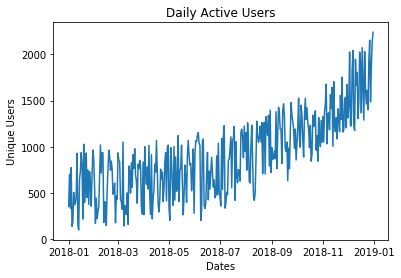

In [50]:
plt.plot(daily_unqiue_active_users)
plt.title('Daily Active Users')
plt.xlabel('Dates')
plt.ylabel('Unique Users')
plt.plot()

[]

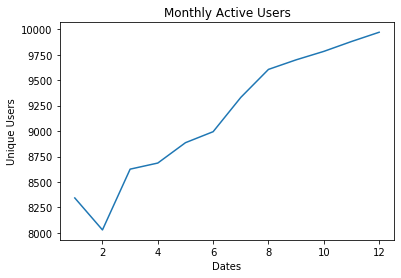

In [51]:
plt.plot(monthly_unqiue_active_users)
plt.title('Monthly Active Users')
plt.xlabel('Dates')
plt.ylabel('Unique Users')
plt.plot()

# Analysis different countries


In [27]:
combined_stream.country.value_counts()

India            282333
Nigeria          167418
United States     84254
China             27058
Name: country, dtype: int64

In [29]:
combined_stream.groupby('country').device_id.nunique()

country
China             478
India            5038
Nigeria          2977
United States    1507
Name: device_id, dtype: int64

In [35]:
china_combined_stream = combined_stream[combined_stream['country'] == 'China']
india_combined_stream = combined_stream[combined_stream['country'] == 'India']
nigeria_combined_stream = combined_stream[combined_stream['country'] == 'Nigeria']
us_combined_stream = combined_stream[combined_stream['country'] == 'United States']

In [38]:
china_monthly_unqiue_active_users = china_combined_stream.groupby('server_month').device_id.nunique()
india_monthly_unqiue_active_users = india_combined_stream.groupby('server_month').device_id.nunique()
nigeria_monthly_unqiue_active_users = nigeria_combined_stream.groupby('server_month').device_id.nunique()
us_monthly_unqiue_active_users = us_combined_stream.groupby('server_month').device_id.nunique()

[]

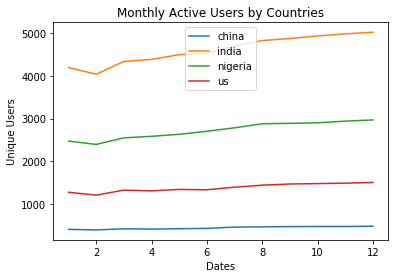

In [52]:
plt.plot(china_monthly_unqiue_active_users, label="china")
plt.plot(india_monthly_unqiue_active_users, label="india")
plt.plot(nigeria_monthly_unqiue_active_users, label="nigeria")
plt.plot(us_monthly_unqiue_active_users, label="us")
plt.title('Monthly Active Users by Countries')
plt.xlabel('Dates')
plt.ylabel('Unique Users')
plt.legend()
plt.plot()